## BIOS 512 Final Project
### Amanda Harris

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [65]:
jobs_gender = read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv")
jobs_gender|> head()
jobs_gender |> tail() #Reading in the dataset & examining categories

,year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.6,120254,126142,95921,76.04208
2,2013,General and operations managers,"Management, Business, and Financial",Management,977284,681627,295657,30.3,73557,81041,60759,74.97316
3,2013,Legislators,"Management, Business, and Financial",Management,14815,8375,6440,43.5,67155,71530,65325,91.32532
4,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,43015,17775,25240,58.7,61371,75190,55860,74.29179
5,2013,Marketing and sales managers,"Management, Business, and Financial",Management,754514,440078,314436,41.7,78455,91998,65040,70.69719
6,2013,Public relations and fundraising managers,"Management, Business, and Financial",Management,44198,16141,28057,63.5,74114,90071,66052,73.33326


,year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
2083,2016,"Packers and packagers, hand","Production, Transportation, and Material Moving",Material Moving,292614,128616,163998,56.045849,23676,26211,22013,83.98382
2084,2016,Pumping station operators,"Production, Transportation, and Material Moving",Material Moving,19540,18917,623,3.188332,62096,62053,67083,NA
2085,2016,Refuse and recyclable material collectors,"Production, Transportation, and Material Moving",Material Moving,65170,58851,6319,9.696179,32367,34488,24268,NA
2086,2016,Mine shuttle car operators,"Production, Transportation, and Material Moving",Material Moving,732,722,10,1.366120,43866,43808,NA,NA
2087,2016,"Tank car, truck, and ship loaders","Production, Transportation, and Material Moving",Material Moving,4198,4155,43,1.024297,44079,44487,NA,NA
2088,2016,"Material moving workers, all other","Production, Transportation, and Material Moving",Material Moving,31072,26478,4594,14.785015,35716,36013,31922,NA


In [67]:
jobs_gender2 = jobs_gender |>
    mutate(earnings_difference = total_earnings_male - total_earnings_female) |>
    group_by(major_category) |>
    summarize(avg_earnings_difference = mean(earnings_difference, na.rm = TRUE)) |>
    mutate(major_category = forcats::fct_reorder(major_category, avg_earnings_difference, .desc=TRUE))

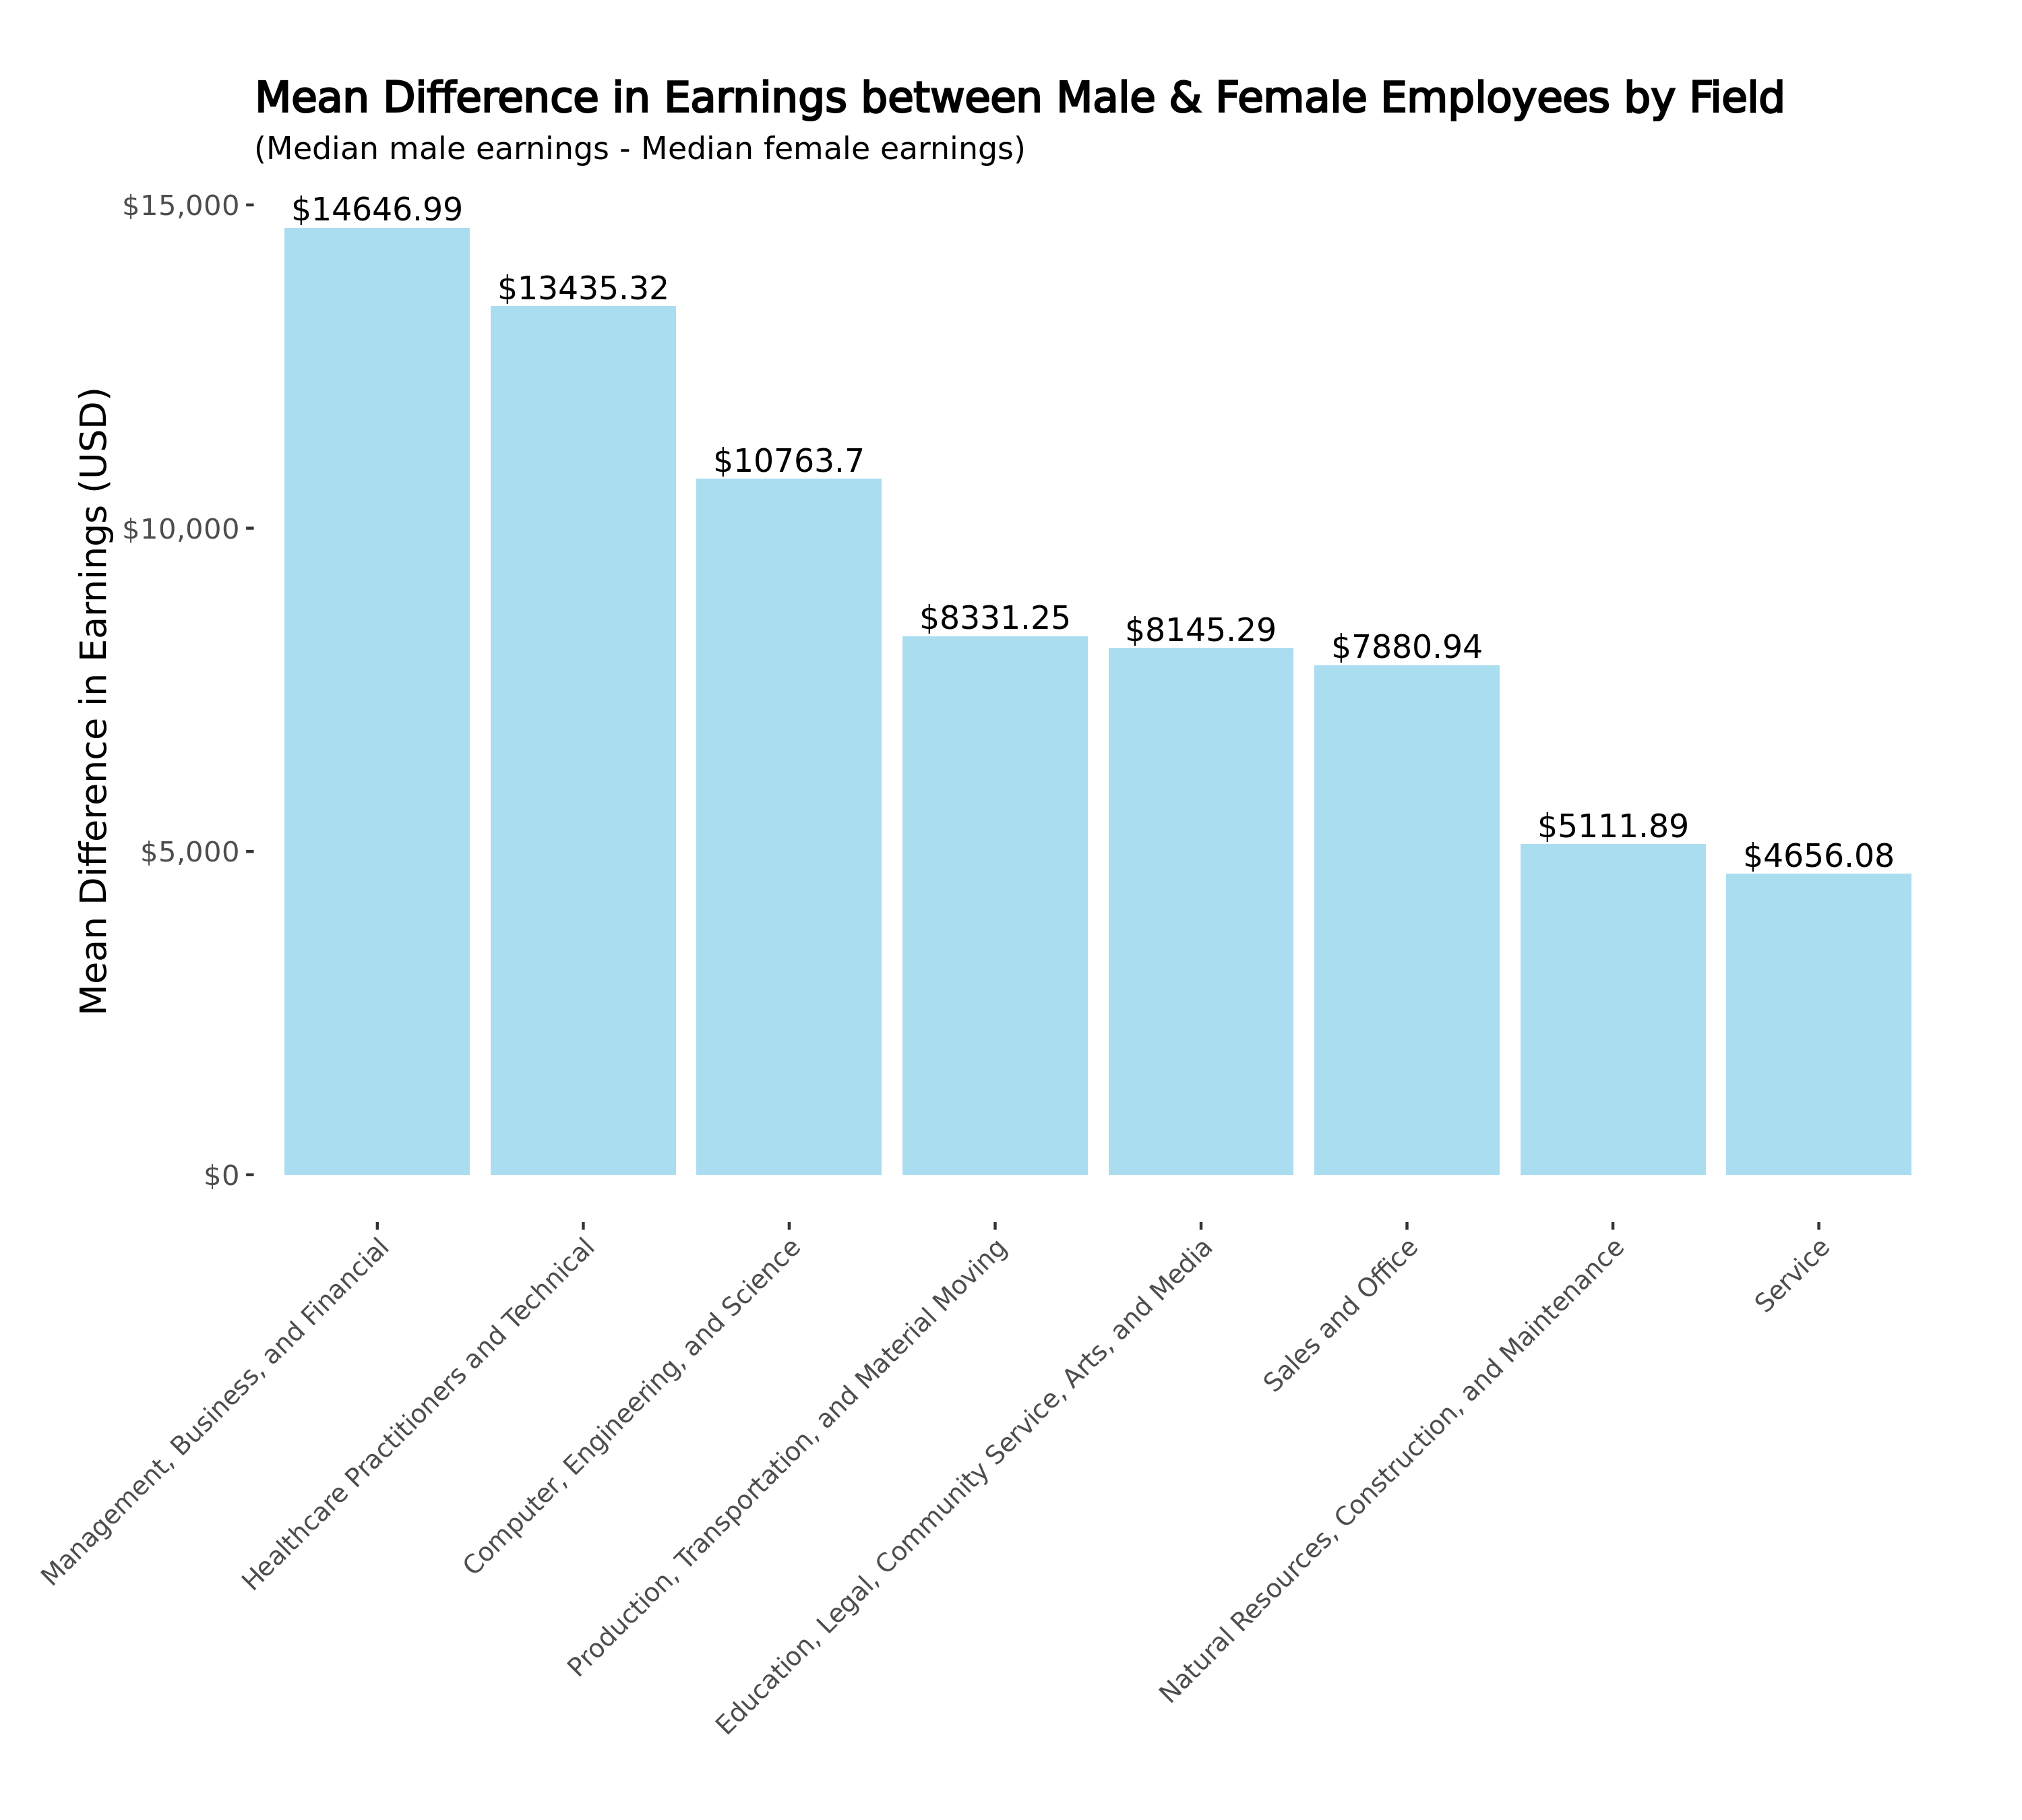

In [68]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 300)
p = ggplot(jobs_gender2, aes(x=major_category, y=avg_earnings_difference)) +
    geom_bar(stat = "identity", fill="skyblue", alpha=0.7) +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(title="Mean Difference in Earnings between Male & Female Employees by Field", 
    subtitle = "(Median male earnings - Median female earnings)",x = NULL, y= "Mean Difference in Earnings (USD)") +
    geom_text(aes(label = paste0("$", round(avg_earnings_difference, 2))),
           vjust=-0.3, 
            size = 4, 
            color = "black") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        plot.title = element_text(size = 15, face = "bold"),
        axis.title = element_text(size = 13),
        axis.text.y = element_text(size = 10),
        plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "white"))
p

### The largest mean difference in compensation between men and women is in the management, business, and financial sector.

#### On average, men in these roles make approximately $14,647 more than women in annual salary. 

In [5]:
ceos_data = jobs_gender |> #Creating a dataset filtered to only include data for CEOs.
    filter(occupation == "Chief executives")

ceos_data

year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.60000,120254,126142,95921,76.04208
2014,Chief executives,"Management, Business, and Financial",Management,1013853,774838,239015,23.60000,122136,130830,101174,77.33242
2015,Chief executives,"Management, Business, and Financial",Management,1040875,796280,244595,23.50000,126200,140057,101496,72.50000
2016,Chief executives,"Management, Business, and Financial",Management,1068258,813898,254360,23.81073,130266,141108,103564,73.39343


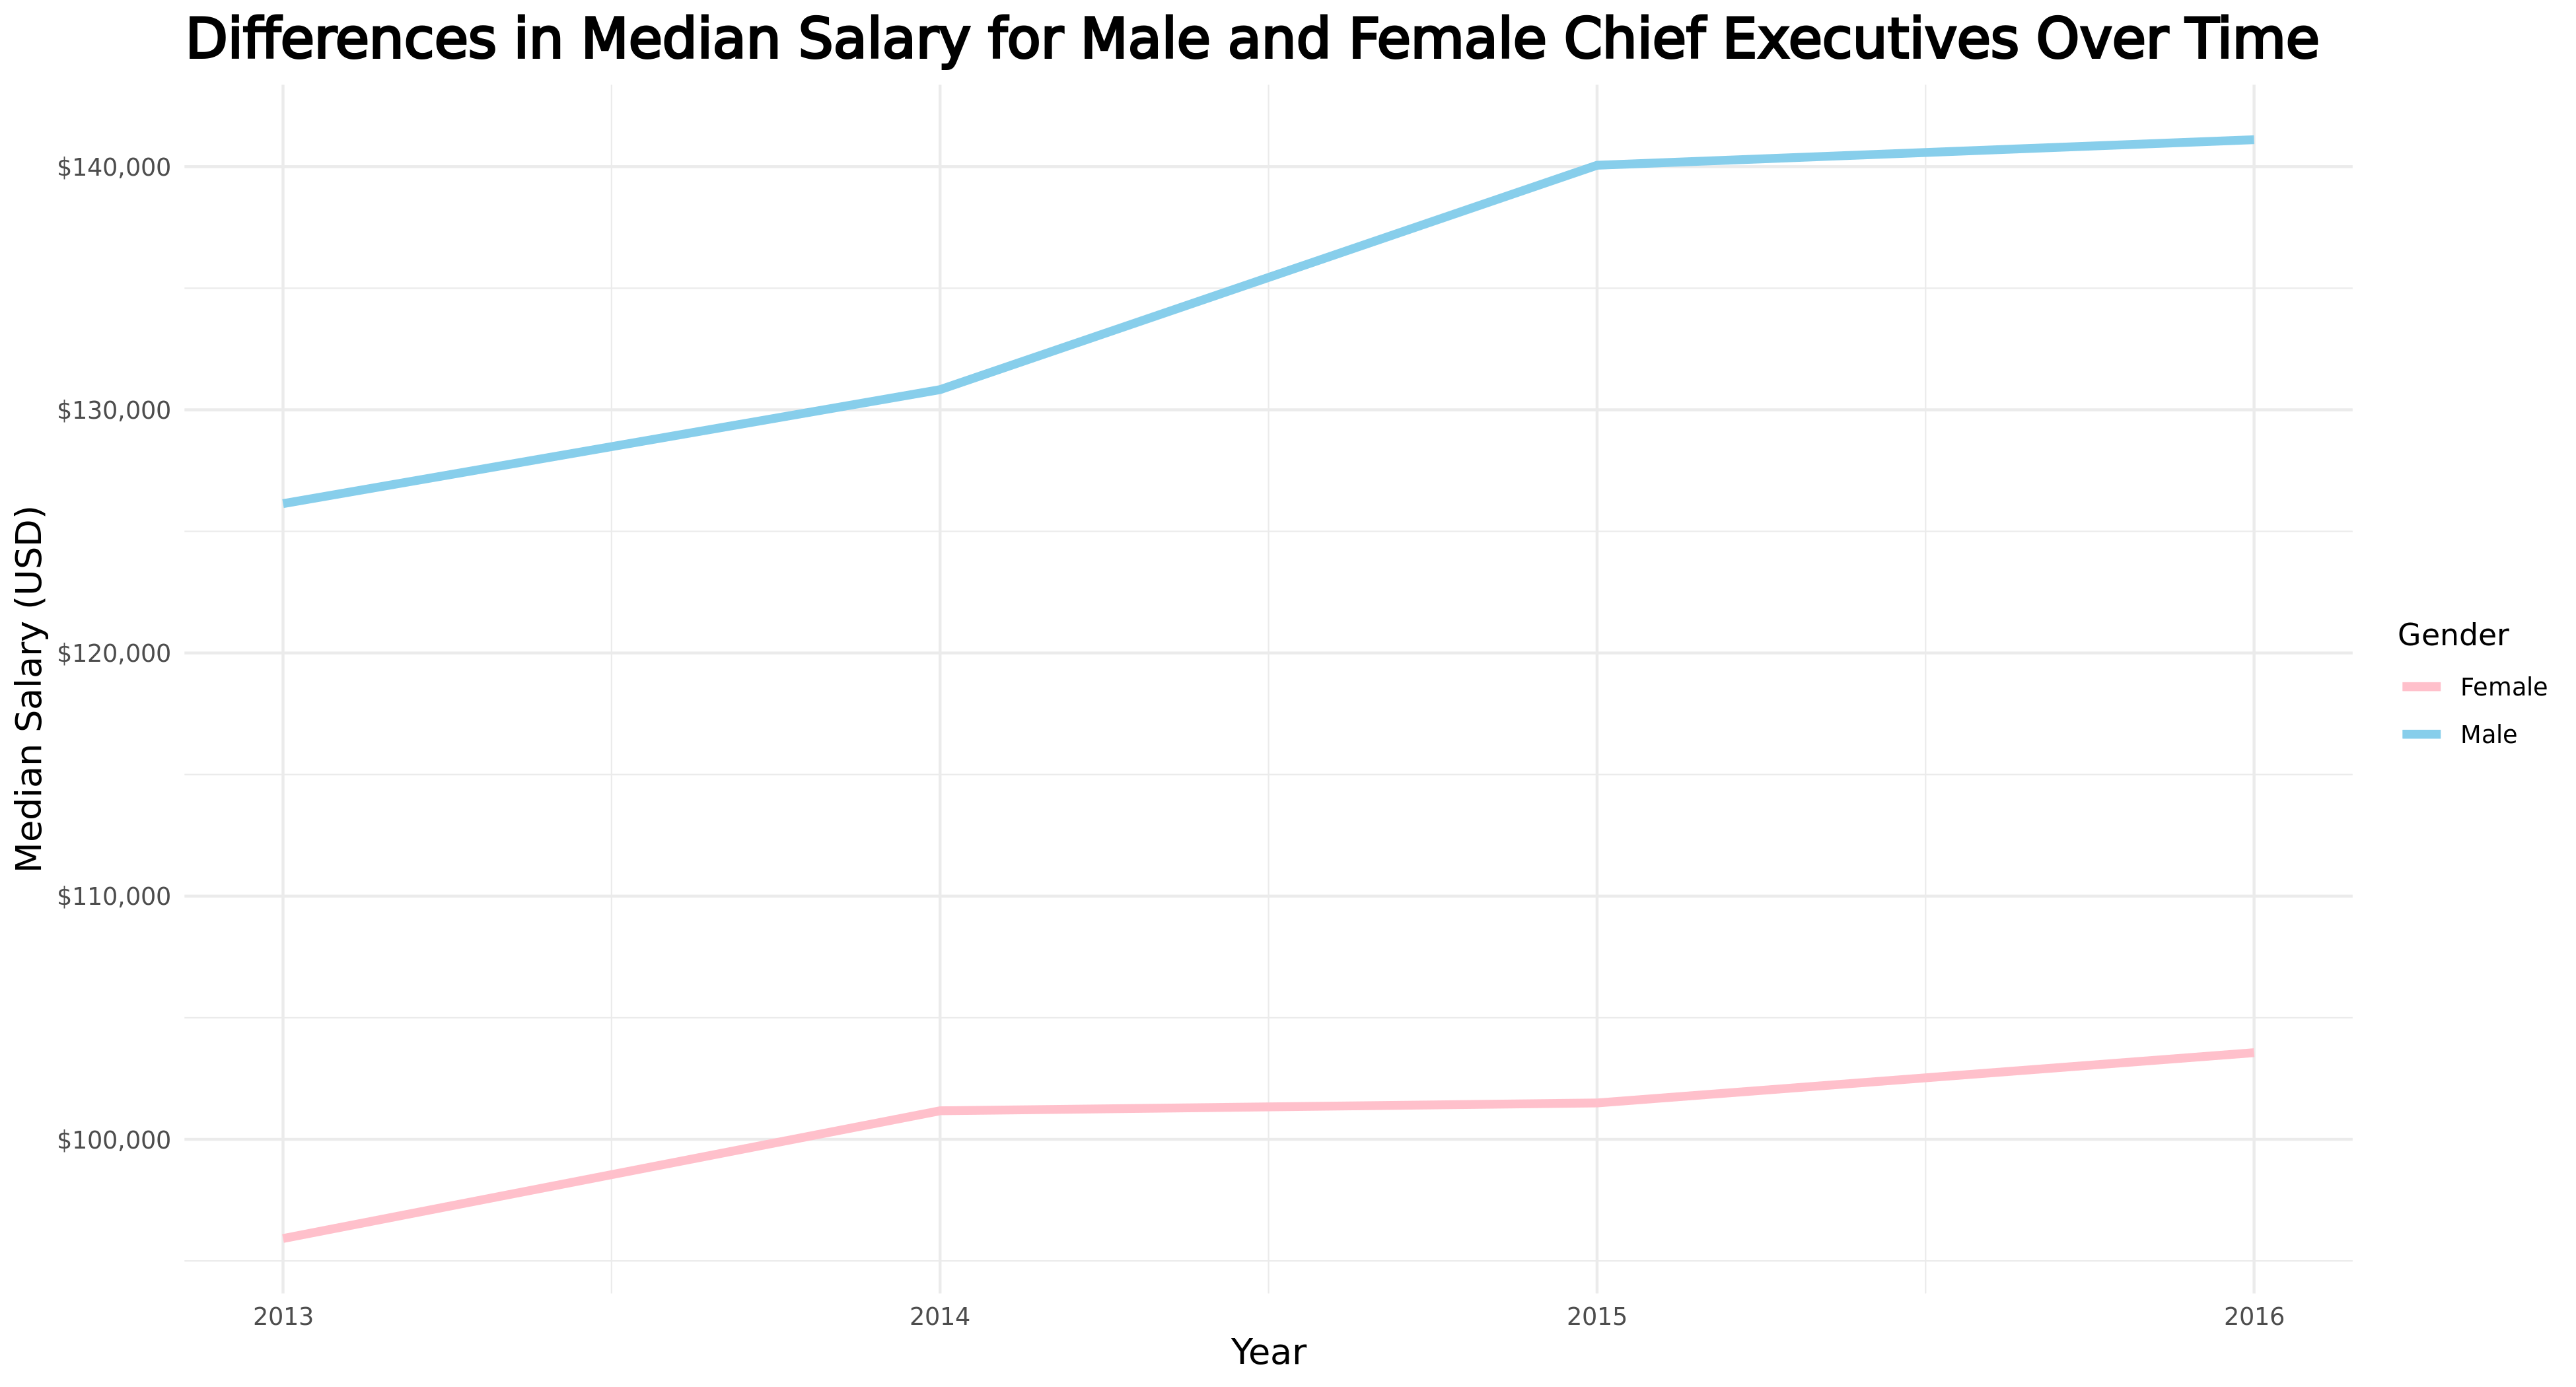

In [18]:
options(repr.plot.width = 13, repr.plot.height = 7, repr.plot.res = 300)
p=ggplot(ceos_data, aes(x = year)) +
  geom_line(aes(y = total_earnings_male, color = "Male"), linewidth = 1.5) +
  geom_line(aes(y = total_earnings_female, color = "Female"), linewidth = 1.5) +
scale_y_continuous(labels = scales::dollar_format()) +
  labs(title = "Differences in Median Salary for Male and Female Chief Executives Over Time",
       x = "Year",
       y = "Median Salary (USD)",
       color = "Gender") +
  scale_color_manual(values = c("Male" = "skyblue", "Female" = "pink")) +
  theme_minimal() +
    theme(plot.title = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size=13),
    axis.title.x = element_text(size=13))
p

### While earnings for chief executives have increased for both men and women since 2013, a stark gap remains between median salary for female CEOs and male CEOs.

In [31]:
filtered_2016 <- jobs_gender |>
  filter(year == 2016)

top10_female_professions <- filtered_2016 |>
  slice_max(order_by = percent_female, n = 10) |>
  pull(occupation)

jobs_gender3 <- jobs_gender |>
  filter(occupation %in% top10_female_professions, year == 2016) |>
    mutate(occupation = fct_reorder(occupation, desc(percent_female)))

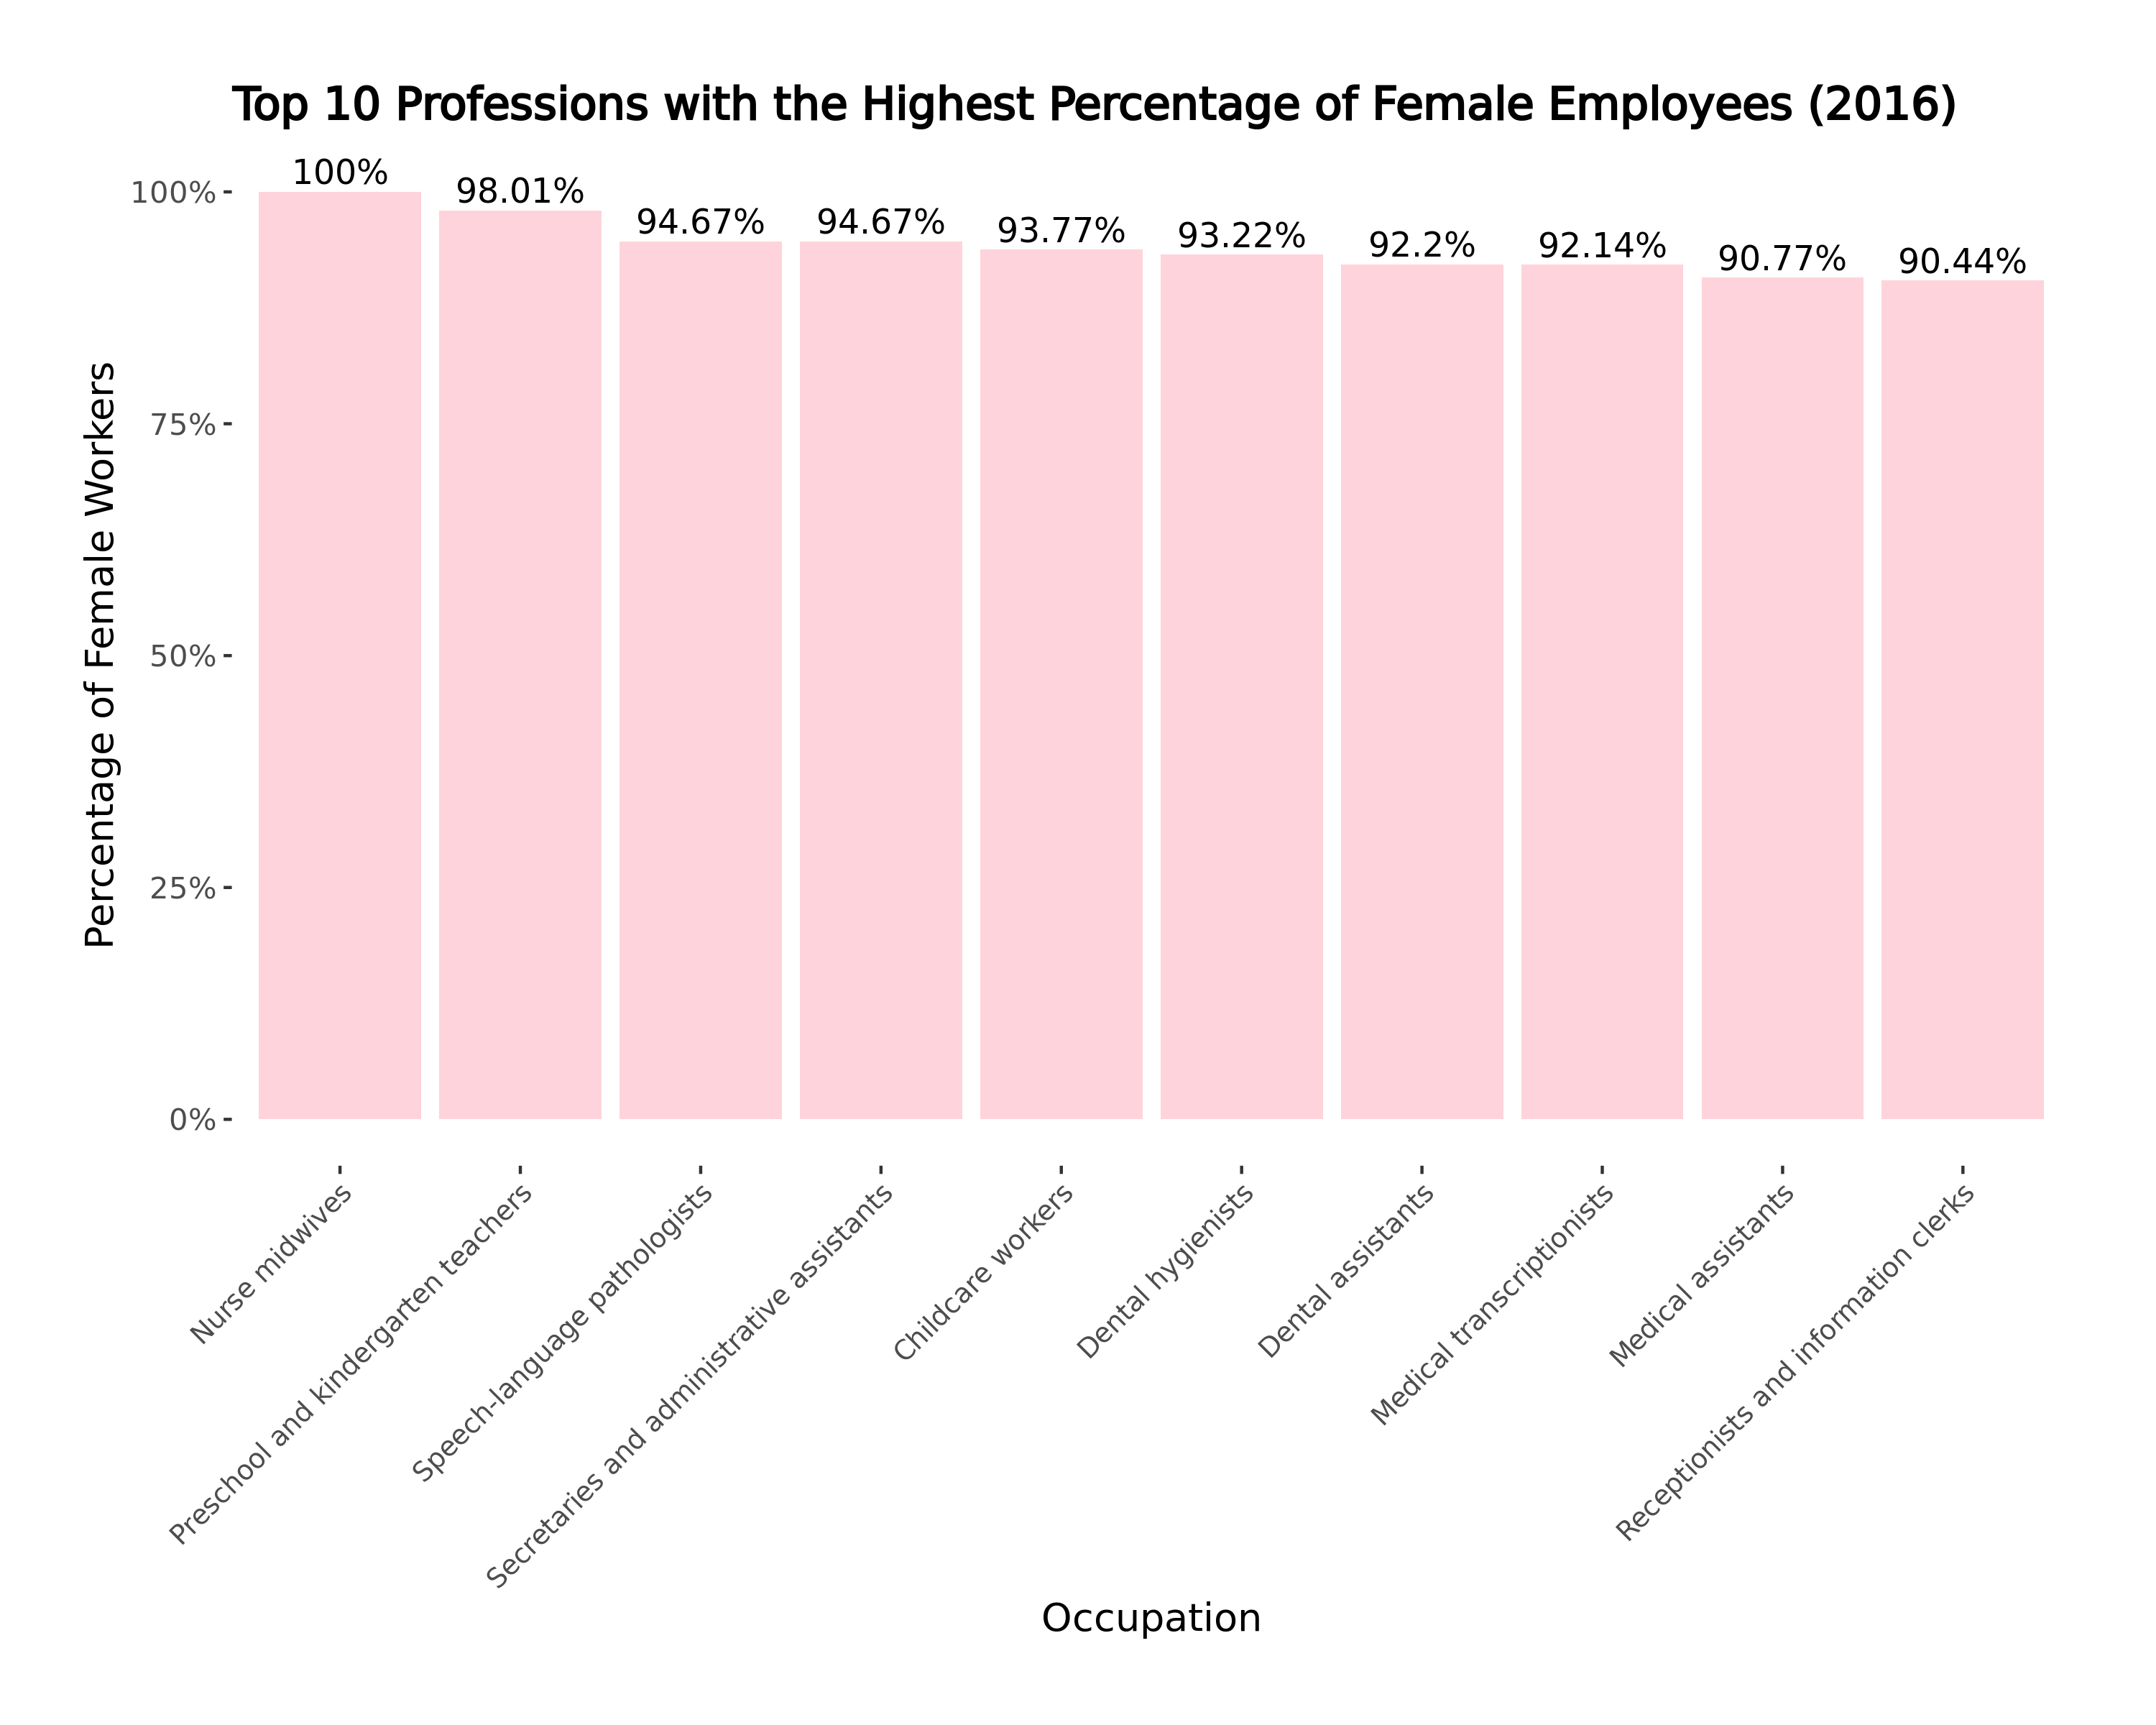

In [70]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)
p=ggplot(jobs_gender3, aes(x=occupation, y=percent_female)) +
  geom_bar(stat = "identity", fill = "pink", alpha = 0.7) +
geom_text(aes(label = paste0(round(percent_female, 2), "%")),
           vjust=-0.3, 
            size = 4, 
            color = "black") +
  labs(title = "Top 10 Professions with the Highest Percentage of Female Employees (2016)",
       x = "Occupation",
       y = "Percentage of Female Workers") +
    scale_y_continuous(labels = scales::percent_format(scale = 1)) +
   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        plot.title = element_text(size = 15, face = "bold"),
        axis.title = element_text(size = 13),
        axis.text.y = element_text(size = 10),
        plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "white"))
p

#### Professions with the highest proportion of female workers tend to be professions that have historically been "gendered" as female.

##### Maybe it's because when women do enter male dominated fields, they don't get paid as much. Just an idea :) 

## Narrative Description of Data Analysis 

#### I decided to analyze the jobs_gender dataset from TidyTuesday to examine differences in male & female salaries and occupations. 

#### In my first visualization, I created a mean difference variable to represent the average difference in median salaries between men and women by subtracting the median salary for women (total_earnings_women) from the median salary for men (total_earnings_men). I then grouped the data by field (major_category) to identify which fields have the largest differences in salary compensation between men and women. I displayed this data in a barchart in descending order. The data demonstrates that men make considerably more than women on average, particularly among fields that have historically been "gendered" male (computer science, healthcare, business/finance, etc.). This pattern is further illustrated as the average difference in salary compensation decreases as we look at fields that are not as male-dominated (service, education, etc.).

#### Next, I decided to look at how compensation differs between men & women for traditionally high paying roles. Therefore, I filtered my dataset to include only chief executive officers. I graphed the median salary for men & women in CEO positions from 2013 to 2016 to 1). Identify changes in CEO compensation trends over time between men and women, and 2). Visualize the gaps in compensation for men & women in the exact same occupation category. The data displays major differences in salary between male & female CEOs. While salary has increased over time for both male & female CEOs, the gap in compensation between men & women displayed little to no decrease. 

#### Lastly, I decided to examine which occupations women dominated the most in the dataset. I decided to filter the data to only include information from 2016, so I could look at the most recent available data. I created a barchart capturing the top 10 occupations with the highest percentage of female workers. As we can see, these top 10 occupations are all jobs that tend to be regarded as female "gendered" roles. To that, I pose this question: Are women remaining in female-gendered roles because they are not taken seriously enough to be fairly compensated in male-gendered roles? 